In [100]:
from minisom import MiniSom
import pandas as pd
import numpy as np

In [101]:
base = pd.read_csv('credit_data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92

In [102]:
x = base.iloc[:, 1:4].values
y = base.iloc[:, 4].values

In [103]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
x = normalizador.fit_transform(x)

In [104]:
som = MiniSom(x = 15, y = 15, input_len = 3, sigma = 1.0, random_seed = 0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

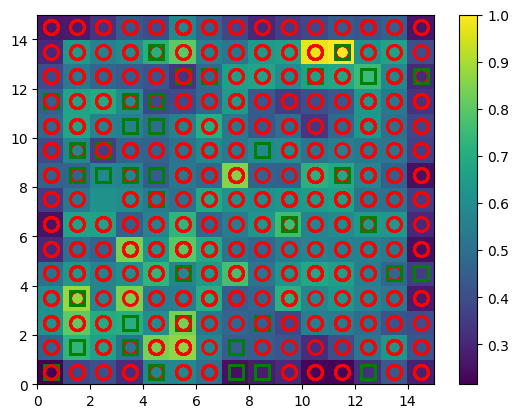

In [98]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)


In [105]:
mapeamento = som.win_map(x)
suspeitos = np.concatenate((mapeamento[(12, 14)], mapeamento[(11, 14)]), axis = 0)
suspeitos = normalizador.inverse_transform(suspeitos)

classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i, 1] == suspeitos[j, 0] and base.iloc[i, 2] == suspeitos[j, 1] and base.iloc[i, 3] == suspeitos[j, 2]:
            classe.append(base.iloc[i, 4])
classe = np.asarray(classe)

# suspeitos_final = np.column_stack((suspeitos, classe))
# suspeitos_final = suspeitos_final[suspeitos_final[:, 3].argsort()]